# Libraries, global variables

In [1]:
import numpy as np
import os
import re
from Bio.Seq import Seq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alignment_root = './data/main_lancet_other_viruses_for_alignment_and_tree/'

# Multiple sequence alignment (report Fig / paper Fig. 4)

## File preparation (global alignment)

In [23]:
#Individual file preparation : annotation removal
for f in os.listdir(alignment_root):#Every Betacoronavirus sequence except SARS-CoV-2
    if f != 'processed': 
        #Retrieve name
        f_name = re.sub('.fasta','',f)
        with open(alignment_root+f,'r') as file: #Original file 
            with open(alignment_root+'processed/'+f_name+'.fasta','w') as output: #Output file
                output.write('>'+f_name+'\n') #Headers
                for line in file.readlines():
                    if line[0] !='>': #If not a header line
                        output.write(line)
    

In [24]:
#General MAFFT submission (without SARS-CoV-2)
with open(alignment_root+'processed/mafft_submission.fasta','w') as output: #Output file
    for f in os.listdir(alignment_root+'/processed/'):#Every virus sequence pre-processed
        if f != 'mafft_submission.fasta':
            with open(alignment_root+'/processed/'+f,'r') as file: #Orgiinal file
                for line in file.readlines():
                    output.write(line)

In [27]:
#General MAFFT submission (with COVID)
with open(alignment_root+'processed/mafft_submission_with_covid.fasta','w') as output: #Output file
    with open(alignment_root+'/processed/mafft_submission.fasta','r') as file: #Original file, Betacoronavirus
        for line in file.readlines():
            output.write(line)
    with open('./data/main_lancet_10_ncov_seq_combined.fasta','r') as file: #Original file, SARS-CoV-2
        for line in file.readlines():
            output.write(line)     

## File preparation for Fig. 4 reproduction

In [3]:
# Accession numbers used in Figure 4
fig_4_nums =['AY508724','AY485277','AY278489','AY390556','KT444582','KY417146',
            'KY417151','KY417152','MK211376','KY417145','KJ473816','KY770859',
            'KY417142','MK211377','KY417148','JX993988','KJ473815','MK211374',
            'KJ473814','JX993987','DQ648857','GQ153547','DQ084200','GQ153542',
            'KF294457','WH-01','WH-03','WH-04','MG772934','MG772933']

In [62]:
#Spike proteins MAFFT submission file (as for Figure 4)
with open(alignment_root+'processed/spike_proteins.fasta','w') as output: #Output file
    for f in fig_4_nums:
        if f not in ['WH-01','WH-03','WH-04']:#All except SARS-CoV-2
            with open(alignment_root+f+'.fasta','r') as file: #Original file
                output.write('>'+f+'|Spike\n') #headers
                found_spike = False
                prot_seq = ""
                for line in file.readlines():
                    if 'spike' in line or 'S protein' in line or 'protein=S' in line: #Names indicating that the protein is a spike protein
                        found_spike = True
                    elif found_spike == True:
                        if line[0]==">":
                            found_spike = False
                        else:
                            prot_seq = prot_seq + line
                output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n') #Remove escape character + translate 
        else: #SARS-CoV-2 seqs
            with open('./data/spike_fig_4/'+f+'.fasta','r') as file: #orginal file
                for line in file.readlines():
                    output.write(line)
                output.write('\n')
    

In [21]:
#As SARS-CoV-2 spike proteins were retrieved from NCBI, I further wanted to check that the sequences retrieved from NCBI match the ones I had before 

for ret_seq in ['WH-01','WH-03','WH-04']: #3 sequences to be check 
    seq = ""
    cov_seq = ""
    with open('./data/spike_fig_4/'+ret_seq+'.fasta','r') as seq_file: #retrieved seqs
        for l in seq_file.readlines():
            if l[0] != ">":
                seq = seq +l
                b_seq = Seq(re.sub('\n','',seq))
        boo = False
        with open('./data/main_lancet_10_ncov_seq_combined.fasta/','r') as cov_seqs_file:
            for l in cov_seqs_file.readlines():
                if boo:
                    cov_seq = Seq(re.sub('\n','',l))
                    cov_seq_1 = cov_seq.translate(to_stop=False) #ORF1
                    cov_seq_2 = cov_seq[1:].translate(to_stop=False) #ORF2
                    cov_seq_3 = cov_seq[2:].translate(to_stop=False) #ORF3
                    boo = False
                if ret_seq in l: #Sequence is in one of the ORFs
                    boo = True
    print(cov_seq_1.find(b_seq),cov_seq_2.find(b_seq),cov_seq_3.find(b_seq)) #Displays -1 if not found, position otherwise
                
            

7179 -1 -1
-1 -1 7180
-1 7182 -1


Each of the sequences retrieved from NCBI is present in the original file

# Identity measurement (report Fig /paper Fig 2b)

I chose the seq WH19001 as reference (because = to the consensus sequence), together with the ones used in the paper AY390556|SARS-CoV_GZ02, MG772933|bat-SL-CoVZC45|Zhejiang, MG772934|bat-SL-CoVZXC21|Zhejiang

In [5]:
#Retrieving sequences from the alignment file
WHseq = ""
MG772933seq = ""
MG772934seq = ""
AYseq = ""
current_seq = 0
with open('./outputs/Task2/fig2b.pir','r') as alignment:
    count = 0
    for l in alignment.readlines():
        
        if l[0] == ">": #New sequence in the alignment file
            
            if current_seq == 2: 
                current_seq = 3
            elif current_seq == 1:
                current_seq = 2
            elif current_seq == 0:
                current_seq = 1
            else:
                current_seq = 0
        else:
            if current_seq == 0:
                WHseq = WHseq+l
            elif current_seq == 1:
                MG772933seq = MG772933seq+l
            elif current_seq == 2:
                MG772934seq = MG772934seq+l
            elif current_seq == 3:
                AYseq = AYseq+l

WHseq = re.sub('\n','',WHseq)
MG772933seq = re.sub('\n','',MG772933seq)
MG772934seq = re.sub('\n','',MG772934seq)
AYseq = re.sub('\n','',AYseq)

In [6]:
# Sliding window approach definition and ranges initialization 
window_size = 300
sampling = np.arange(0,len(WHseq),window_size) #Window bounds
plotting = np.arange(window_size/2,len(WHseq),window_size) #Window middle is chosen for plotting
MG3_id = np.zeros(len(sampling)-1)
MG4_id = np.zeros(len(sampling)-1)
AY_id = np.zeros(len(sampling)-1)

In [312]:
#Window identity computation
include_gap_sim = False #If we want to count the gap as identity or not 
for i in range(len(sampling)-1):
    MG3_id_loc = 0
    MG4_id_loc = 0
    AY_id_loc = 0
    if not include_gap_sim:
        MG3_gaps = 0
        MG4_gaps = 0
        AY_gaps = 0
    for j in range(window_size):
        if WHseq[window_size*i+j] == MG772933seq[window_size*i+j]:
            MG3_id_loc +=1
            if not include_gap_sim:
                if WHseq[window_size*i+j] == '-':
                    MG3_id_loc -=1
                    MG3_gaps +=1
        if WHseq[window_size*i+j] == MG772934seq[window_size*i+j]:
            MG4_id_loc +=1
            if not include_gap_sim:
                if WHseq[window_size*i+j] == '-':
                    MG4_id_loc -=1
                    MG4_gaps +=1
        if WHseq[window_size*i+j] == AYseq[window_size*i+j]:
            AY_id_loc +=1
            if not include_gap_sim:
                if WHseq[window_size*i+j] == '-':
                    AY_id_loc -=1
                    AY_gaps +=1
    MG3_id[i] = MG3_id_loc/window_size
    MG4_id[i] = MG4_id_loc/window_size
    AY_id[i] = AY_id_loc/window_size
    if not include_gap_sim:
        MG3_id[i] = MG3_id[i-1] #to ensure validity
        MG4_id[i] = MG4_id[i-1] #to ensure validity
        AY_id[i] = AY_id[i-1] #to ensure validity
        if window_size-MG3_gaps !=0:
            MG3_id[i] = MG3_id_loc/(window_size-MG3_gaps)
        if window_size-MG4_gaps !=0:
            MG4_id[i] = MG4_id_loc/(window_size-MG4_gaps)
        if window_size-AY_gaps !=0:
            AY_id[i] = AY_id_loc/(window_size -AY_gaps)

            
        

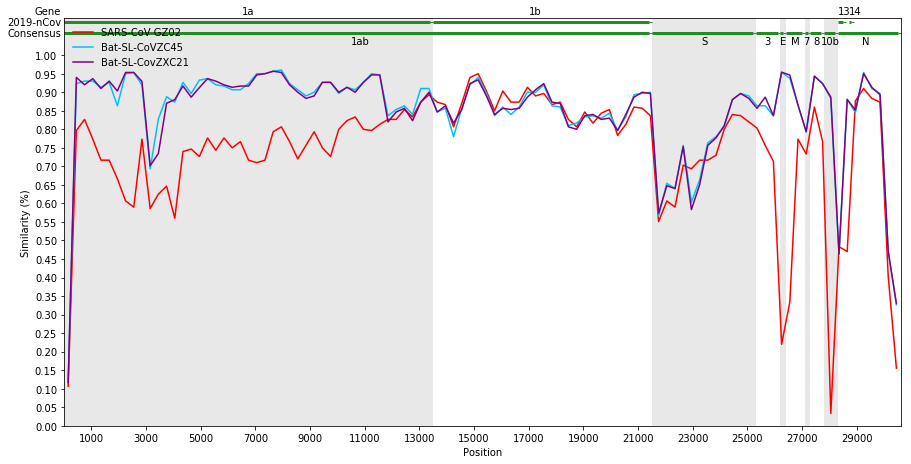

In [313]:
#Displaying
plt.figure(figsize=(15,7.5))

plt.plot(plotting,AY_id,'r',label='SARS-CoV GZ02')
plt.plot(plotting,MG3_id,'deepskyblue',label='Bat-SL-CoVZC45')
plt.plot(plotting,MG4_id,'purple',label='Bat-SL-CovZXC21')

plt.xticks(np.arange(1000,30000,2000))
plt.yticks(np.arange(0,1.02,0.05))
plt.xlim(0,30620)
plt.ylim(0,1.1)
plt.ylabel('Similarity (%)')
plt.xlabel('Position')

#Annotations
plt.hlines(1.09,0,13400,colors="forestgreen",linewidth=3)
plt.hlines(1.09,13400,13500,colors="forestgreen",linewidth=1)
plt.axvspan(0, 13500, facecolor='lightgray',alpha=0.5)
plt.text(6500,1.11,"1a")

plt.hlines(1.09,13500,21400,colors="forestgreen",linewidth=3)
plt.hlines(1.09,21400,21500,colors="forestgreen",linewidth=1)
plt.text(17000,1.11,"1b")

plt.hlines(1.06,0,21400,colors="forestgreen",linewidth=3)
plt.hlines(1.06,21400,21500,colors="forestgreen",linewidth=1)
plt.text(10500,1.03,"1ab")

plt.hlines(1.06,21500,25200,colors="forestgreen",linewidth=3)
plt.hlines(1.06,25200,25300,colors="forestgreen",linewidth=1)
plt.axvspan(21500, 25300, facecolor='lightgray',alpha=0.5)
plt.text(23300,1.03,"S")

plt.hlines(1.06,25300,26100,colors="forestgreen",linewidth=3)
plt.hlines(1.06,26100,26200,colors="forestgreen",linewidth=1)
plt.text(25600,1.03,"3")

plt.hlines(1.06,26200,26300,colors="forestgreen",linewidth=3)
plt.hlines(1.06,26300,26400,colors="forestgreen",linewidth=1)
plt.axvspan(26200, 26400, facecolor='lightgray',alpha=0.5)
plt.text(26200,1.03,"E")

plt.hlines(1.06,26400,27000,colors="forestgreen",linewidth=3)
plt.hlines(1.06,27000,27100,colors="forestgreen",linewidth=1)
plt.text(26600,1.03,"M")

plt.hlines(1.06,27100,27200,colors="forestgreen",linewidth=3)
plt.hlines(1.06,27200,27300,colors="forestgreen",linewidth=1)
plt.axvspan(27100, 27300, facecolor='lightgray',alpha=0.5)
plt.text(27050,1.03,"7")

plt.hlines(1.06,27300,27700,colors="forestgreen",linewidth=3)
plt.hlines(1.06,27700,27800,colors="forestgreen",linewidth=1)
plt.text(27400,1.03,"8")

plt.hlines(1.06,27800,28200,colors="forestgreen",linewidth=3)
plt.hlines(1.06,28200,28300,colors="forestgreen",linewidth=1)
plt.axvspan(27800, 28300, facecolor='lightgray',alpha=0.5)
plt.text(27700,1.03,"10b")

plt.hlines(1.06,28300,30500,colors="forestgreen",linewidth=3)
plt.hlines(1.06,30500,30600,colors="forestgreen",linewidth=1)
plt.text(29200,1.03,"N")

plt.hlines(1.09,28300,28500,colors="forestgreen",linewidth=3)
plt.hlines(1.09,28500,28600,colors="forestgreen",linewidth=1)
plt.text(28300,1.11,"13")

plt.hlines(1.09,28700,28800,colors="forestgreen",linewidth=3)
plt.hlines(1.09,28800,28900,colors="forestgreen",linewidth=1)
plt.text(28700,1.11,"14")

plt.legend(framealpha=0.0)
plt.text(-100,1.11,"Gene",horizontalalignment='right')
plt.text(-100,1.08,"2019-nCov",horizontalalignment='right')
plt.text(-100,1.05,"Consensus",horizontalalignment='right')
plt.savefig(str(window_size)+str(include_gap_sim)+".png",dpi=300)

# ORF level phylogeny (report Fig / paper Fig )

For the non-annotated genes, I took the positions from Pubmed

In [2]:
#Accession numbers to be included 
fig_s_nums = ['GQ153547','DQ084200','KF294457','GQ153542','KJ473815','DQ648857',
             'MK211377','KY417142','KY417148','JX993988','KJ473814','JX993987',
              'MK211374','KJ473816','KY770859','KY417145','WH-03','WH-04',
             'WH19005','YS8011','WH-01','WH19001','WH19004','WH19008',
             'MG772934','MG772933','AY485277','AY508724','AY390556','AY278489',
             'KY417146','KT444582','KY417152','KY417151','MK211376','GU190215',
             'KY352407']


First, as we retrieved annotated sequences from NCBI, check the differences between NCBI retrieved and original seq

In [4]:
test = 'WH-03'
found = False
original_seq = ""
retrieved_seq = ""
with open('./data/main_lancet_10_ncov_seq_combined.fasta','r') as file:
    for l in file.readlines():
        if found : 
            original_seq = Seq(re.sub('\n','',l))
            found = False
            
        elif (test in l):
            found = True
with open('./data/retrieved_wh_seq/'+test+'.fasta','r') as file:
    for l in file.readlines():
        if l[0] != ">":
            retrieved_seq = retrieved_seq + l
retrieved_seq = Seq(re.sub('\n','',retrieved_seq))
print(len(retrieved_seq),len(original_seq))
        

29858 29868


In [5]:
original_seq in retrieved_seq

False

In [6]:
len('---------------')

15

Method :
Download seq from NCBI

Align original and retrieved seq with MAFFT

Usually, differences at the ends => from MAFFT, infer the shift

From NCBI, find the location of gene of interest. I also downloaded the protein sequence from NCBI, in order to check

Annotations were retrievable only for WH-01 , 03 , 04 => for the rest, I inferred the spike sequence from the alignment

In [ ]:
spikes_wh = {'WH-03':[21526,25347], #Take care, here numeration begins with one !
             'WH-04':[21563,25384],
             'WH19005',
             'YS8011',
             'WH-01':[21563,25384],
             'WH19001',
             'WH19004',
             'WH19008'}
shifts_wh{'WH-03':-17, #retrieved shorter than original
          'WH-04':15,
          'WH19005',
          'YS8011',
          'WH-01':25,
          'WH19001',
          'WH19004',
          'WH19008'}

In [7]:
aligned_covids = dict()
with open('./outputs/Task4/all_covid.fasta','r') as alignments:
    key = ""
    for l in alignments.readlines():
        print(key,len(l))
        if l[0] ==">" :
            key = l[1:-1]
        else:
            if key not in aligned_covids:
                aligned_covids[key] = re.sub('\n','',l)
            else:
                aligned_covids[key] = aligned_covids[key]+re.sub('\n','',l)
            

    

 9
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002 61
WH19002

WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61
WH19001 61

WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61
WH19004 61

WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
WH-01 61
W

WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 61
WH-04 42
WH-04 7
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH-02 61
WH

In [8]:
Seq(re.sub('-','',aligned_covids['WH-03'])[21525+17:25345+17]).translate()

C:\Users\eloi0\Anaconda3\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT', ExtendedIUPACProtein())

In [9]:
def find_seq_in_align(seq,align):
    if seq in align:
        start = align.find(seq)
        return([(start,start+len(seq))])
    else:
        i=-1
        while seq[:i] not in align:
            i-=1
        following = find_seq_in_align(seq[i:],align)
        start = align.find(seq[:i])
        return [(start,start+len(seq[:i]))]+following

In [10]:
find_seq_in_align(re.sub('-','',aligned_covids['WH-03'])[21525+17:25345+17],aligned_covids['WH-03'])

[(21877, 23591), (23592, 25698)]

In [11]:
Seq(re.sub('-','',aligned_covids['WH-01'])[21562-25:25382-25]).translate()

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT', ExtendedIUPACProtein())

In [12]:
find_seq_in_align(re.sub('-','',aligned_covids['WH-01'])[21562-25:25382-25],aligned_covids['WH-01'])

[(21877, 23591), (23592, 25698)]

In [13]:
find_seq_in_align(re.sub('-','',aligned_covids['WH-04'])[21562-15:25382-15],aligned_covids['WH-04'])

[(21877, 23591), (23592, 25698)]

All sequence seem to be between these positions

In [14]:
spikes_seq = dict()
for key in aligned_covids.keys():
    spikes_seq[key] = re.sub('-','',aligned_covids[key][21877:25698])
    

In [15]:
for key in aligned_covids.keys():
    print(len(spikes_seq[key]))

3159
3820
3820
3820
3820
3820
3820
3820
3820
3820


It's ok, except for the first one but we don't care as it's not part of the SARS-CoV-2 strains that we will use

In [16]:
len(spikes_seq['WH19002'])

3159

In [17]:
for key in aligned_covids.keys():
    print(key,len(re.sub('-','',aligned_covids[key])))

WH19002 26973
WH19008 29891
WH19001 29891
WH19005 29891
WH19004 29896
YS8011 29890
WH-01 29866
WH-03 29868
WH-04 29872
WH-02 29388


And actually, WH19002 is really shorter than others

In [18]:
for k in aligned_covids.keys():
    print(k,spikes_seq[k] == spikes_seq['WH-01'])

WH19002 False
WH19008 False
WH19001 True
WH19005 True
WH19004 True
YS8011 True
WH-01 True
WH-03 True
WH-04 True
WH-02 False


Actually, all the sequence we want are the same except 19008 (what was expected from the paper) ! (they excluded the 2 not matching)

In [19]:
for i in range(len(spikes_seq['WH-01'])):
    if spikes_seq['WH-01'][i] != spikes_seq['WH19008'][i]:
        print(i,spikes_seq['WH-01'][i],spikes_seq['WH19008'][i])

2762 A G


## Final data preparation

In [20]:
#Genome level
alignment_root = './data/main_lancet_other_viruses_for_alignment_and_tree/'
with open(alignment_root+'processed/spike_proteins_dna.fasta','w') as output: #output file
    for f in fig_s_nums:
        if f not in ['WH-03','WH-04','WH19005','YS8011','WH-01','WH19001','WH19004','WH19008',]:#I had to download this from the web directly
            with open(alignment_root+f+'.fasta','r') as file: #orginal file
                output.write('>'+f+'|Spike\n') #headers
                found_spike = False
                prot_seq = ""
                for line in file.readlines():
                    if 'spike' in line or 'S protein' in line or 'protein=S' in line:
                        found_spike = True
                    elif found_spike == True:
                        if line[0]==">":
                            found_spike = False
                        else:
                            prot_seq = prot_seq + line
                output.write(re.sub('\n','',prot_seq)+'\n')
                #output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n')
        else: #COVID seqs
            output.write(">"+f+"|Spike"+"\n")
            output.write(spikes_seq[f])
            output.write('\n')

In [122]:
#Protein level
alignment_root = './data/main_lancet_other_viruses_for_alignment_and_tree/'
with open(alignment_root+'processed/spike_proteins_prot.fasta','w') as output: #output file
    for f in fig_s_nums:
        if f not in ['WH-03','WH-04','WH19005','YS8011','WH-01','WH19001','WH19004','WH19008',]:#I had to download this from the web directly
            with open(alignment_root+f+'.fasta','r') as file: #orginal file
                output.write('>'+f+'|Spike\n') #headers
                found_spike = False
                prot_seq = ""
                for line in file.readlines():
                    if 'spike' in line or 'S protein' in line or 'protein=S' in line:
                        found_spike = True
                    elif found_spike == True:
                        if line[0]==">":
                            found_spike = False
                        else:
                            prot_seq = prot_seq + line
                #output.write(re.sub('\n','',prot_seq)+'\n')
                output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n')
        else: #COVID seqs
            output.write(">"+f+"|Spike"+"\n")
            output.write(str(Seq(spikes_seq[f]).translate(to_stop=True)))
            output.write('\n')

C:\Users\eloi0\Anaconda3\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


## 1b protein

Difficult to retreive this annotation => looked on NCBI at join (..., ...) and took the second

In [ ]:
oneb_wh = {'WH-03':[13468,21555], #Take care, here numeration begins with one !
             'WH-04':[13468,21555],
             'WH19005',
             'YS8011',
             'WH-01':[13468,21555],
             'WH19001',
             'WH19004',
             'WH19008'}

In [24]:
Seq(re.sub('-','',aligned_covids['WH-01'])[13467-25:21554-25]).translate()

Seq('RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDD...VNN', ExtendedIUPACProtein())

In [25]:
Seq(re.sub('-','',aligned_covids['WH-03'])[13467+17:21554+17]).translate()

Seq('AAQALVLMSYTGLLTSTMIK*LVLLNS*KLIVVASKKRTKMTI*LILTL*LRDT...LLP', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [26]:
Seq(re.sub('-','',aligned_covids['WH-04'])[13467-15:21554-15]).translate()

Seq('RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDD...VNN', ExtendedIUPACProtein())

In [27]:
find_seq_in_align(re.sub('-','',aligned_covids['WH-01'])[13467-25:21554-25],aligned_covids['WH-01'])

[(13760, 16085),
 (16087, 16873),
 (16884, 20200),
 (20201, 20438),
 (20440, 20894),
 (20895, 20968),
 (20973, 21869)]

In [28]:
find_seq_in_align(re.sub('-','',aligned_covids['WH-04'])[13467-15:21554-15],aligned_covids['WH-01'])

[(13760, 16085),
 (16087, 16873),
 (16884, 20200),
 (20201, 20438),
 (20440, 20894),
 (20895, 20968),
 (20973, 21869)]

In [30]:
orf1b_seq = dict()
for key in aligned_covids.keys():
    orf1b_seq[key] = re.sub('-','',aligned_covids[key][13760:21869])
    

In [32]:
for key in aligned_covids.keys():
    print(key,len(orf1b_seq[key]))

WH19002 7479
WH19008 8087
WH19001 8087
WH19005 8087
WH19004 8087
YS8011 8087
WH-01 8087
WH-03 8087
WH-04 8087
WH-02 8100


In [33]:
for k in aligned_covids.keys():
    print(k,orf1b_seq[k] == orf1b_seq['WH-01'])

WH19002 False
WH19008 True
WH19001 True
WH19005 False
WH19004 True
YS8011 True
WH-01 True
WH-03 True
WH-04 True
WH-02 False


Except from the two strains not included in the fig, only WH19005 sequence is different : we see what is in the paper !

In [34]:
for i in range(len(orf1b_seq['WH-01'])):
    if orf1b_seq['WH-01'][i] != orf1b_seq['WH19005'][i]:
        print(i,orf1b_seq['WH-01'][i],orf1b_seq['WH19005'][i])

7202 G A
7211 G A


In [120]:
#Genome level
alignment_root = './data/main_lancet_other_viruses_for_alignment_and_tree/'
with open(alignment_root+'processed/orf1b_dna.fasta','w') as output: #output file
    for f in fig_s_nums:
        if f not in ['WH-03','WH-04','WH19005','YS8011','WH-01','WH19001','WH19004','WH19008',]:#I had to download this from the web directly
            with open(alignment_root+f+'.fasta','r') as file: #orginal file
                output.write('>'+f+'|orf1b\n') #headers
                found_spike = False
                is_ab = False
                is_ab_seq = ""
                prot_seq = ""
                for line in file.readlines():
                    if '1b' in line or '1B' in line: 
                        found_spike = True
                    elif ('1ab' in line or 'protein_id=ABG47068.1' in line or 'nonstructural polyprotein' in line):
                        found_spike = True
                        is_ab = True  #orf 1ab instead of 1b
                        is_ab_seq = line
                    elif found_spike == True:
                        if line[0]==">":
                            found_spike = False
                        else:
                            prot_seq = prot_seq + line
                if not is_ab : #if it was orf1b, it's the full seq
                    output.write(re.sub('\n','',prot_seq)+'\n')
                else: #otherwise, we have to disentangle the 1b part
                    start1a = int(re.sub('\..*','',re.sub('.*join\(','',is_ab_seq)))
                    end1a = int(re.sub('.*\.\.','',re.sub(',.*','',re.sub('.*join\(','',is_ab_seq))))
                    start1b = int(re.sub('\..*','',re.sub('.*join\(.*,','',is_ab_seq)))
                    end1b = int(re.sub('\).*','',re.sub('.*\.\.','',re.sub('.*join\(.*,','',is_ab_seq))))
                    clean_seq = str(re.sub('\n','',prot_seq))
                    output.write(clean_seq[start1b-start1a+1:]+"\n")
                    
                #output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n')
        else: #COVID seqs
            output.write(">"+f+"|orf1b"+"\n")
            output.write(spikes_seq[f])
            output.write('\n')

In [ ]:
#Protein level
alignment_root = './data/main_lancet_other_viruses_for_alignment_and_tree/'
with open(alignment_root+'processed/orf1b_prot.fasta','w') as output: #output file
    for f in fig_s_nums:
        if f not in ['WH-03','WH-04','WH19005','YS8011','WH-01','WH19001','WH19004','WH19008',]:#I had to download this from the web directly
            with open(alignment_root+f+'.fasta','r') as file: #orginal file
                output.write('>'+f+'|orf1b\n') #headers
                found_spike = False
                is_ab = False
                is_ab_seq = ""
                prot_seq = ""
                for line in file.readlines():
                    if '1b' in line or '1B' in line: 
                        found_spike = True
                    elif ('1ab' in line or 'protein_id=ABG47068.1' in line or 'nonstructural polyprotein' in line):
                        found_spike = True
                        is_ab = True  #orf 1ab instead of 1b
                        is_ab_seq = line
                    elif found_spike == True:
                        if line[0]==">":
                            found_spike = False
                        else:
                            prot_seq = prot_seq + line
                if not is_ab : #if it was orf1b, it's the full seq
                    output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n')
                else: #otherwise, we have to disentangle the 1b part
                    start1a = int(re.sub('\..*','',re.sub('.*join\(','',is_ab_seq)))
                    end1a = int(re.sub('.*\.\.','',re.sub(',.*','',re.sub('.*join\(','',is_ab_seq))))
                    start1b = int(re.sub('\..*','',re.sub('.*join\(.*,','',is_ab_seq)))
                    end1b = int(re.sub('\).*','',re.sub('.*\.\.','',re.sub('.*join\(.*,','',is_ab_seq))))
                    clean_seq = str(re.sub('\n','',prot_seq))
                    output.write(str(Seq(clean_seq[start1b-start1a+1:]).translate(to_stop=True))+"\n")
                    
                #output.write(str(Seq(re.sub('\n','',prot_seq)).translate(to_stop=True))+'\n')
        else: #COVID seqs
            output.write(">"+f+"|orf1b"+"\n")
            output.write(str(Seq(spikes_seq[f]).translate(to_stop=True)))
            output.write('\n')

# PCA clustering 

Inspired from https://towardsdatascience.com/machine-learning-for-biology-how-will-covid-19-mutate-next-4df93cfaf544?gi=61a92d5d5a3a

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Kaggle dataset

In [59]:
kaggle_data = pd.read_csv('data/kaggle_data_MN997409.1-4NY0T82X016-Alignment-HitTable.csv',names=['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score'])

In [60]:
kaggle_data.tail()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
258,MN997409.1,AY283796.1,79.325,1925,357,35,19,1923,3,1906,0.0,1312
259,MN997409.1,AY282752.2,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
260,MN997409.1,AY282752.2,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
261,MN997409.1,AY282752.2,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121
262,MN997409.1,AY282752.2,79.305,1928,358,35,16,1923,1,1907,0.0,1312


In [61]:
kaggle_data.describe()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.00000
mean,86.064958,10711.114068,919.235741,57.821293,11295.684411,21970.517110,11212.646388,21888.836502,0.0,14240.34981
std,7.609654,10530.955700,1085.784789,60.654780,12022.056513,10652.170843,11963.759492,10619.703758,0.0,19226.72192
min,77.559000,1603.000000,0.000000,0.000000,1.000000,1923.000000,1.000000,1672.000000,0.0,1011.00000
25%,80.048000,1925.000000,142.000000,12.000000,16.000000,21577.000000,1.000000,21489.000000,0.0,2101.00000
50%,82.304000,5417.000000,359.000000,35.000000,3956.000000,27910.000000,3875.000000,27783.000000,0.0,3936.00000
75%,90.189000,17716.000000,989.000000,68.000000,22539.000000,29875.500000,22429.000000,29729.000000,0.0,15175.00000
max,100.000000,29882.000000,2952.000000,172.000000,28257.000000,29882.000000,28137.000000,30256.000000,0.0,55182.00000


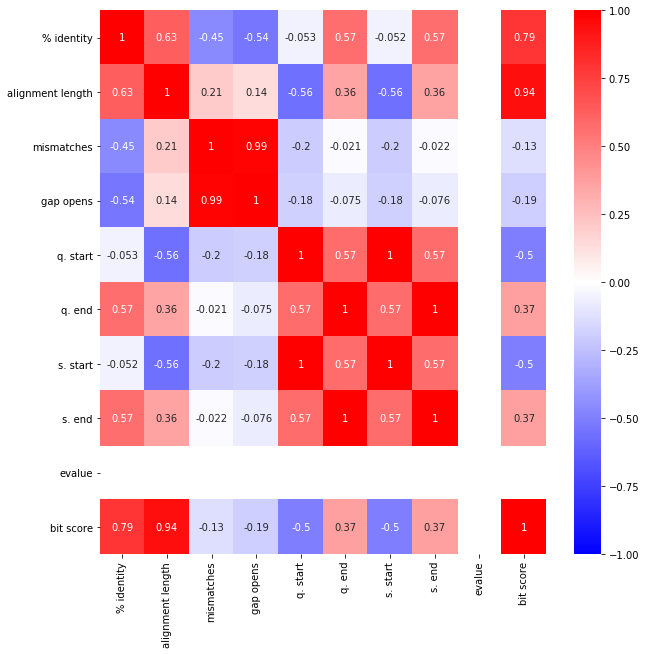

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(kaggle_data.corr(),cmap='bwr',center=0,vmin=-1,vmax=1,annot=True)
plt.show()

In [63]:
kaggle_data_preprocessed = StandardScaler().fit_transform(kaggle_data.drop(['query acc.ver','subject acc.ver','evalue'],axis=1))

In [64]:
kaggle_data_preprocessed.shape

(263, 9)

In [78]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    kaggle_cluster_labels = clusterer.fit_predict(kaggle_data_preprocessed)
    silhouette_avg = silhouette_score(kaggle_data_preprocessed, kaggle_cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5115761580920425
For n_clusters = 3 The average silhouette_score is : 0.6851660836686123
For n_clusters = 4 The average silhouette_score is : 0.8772925303415421
For n_clusters = 5 The average silhouette_score is : 0.9514666476057506
For n_clusters = 6 The average silhouette_score is : 0.9561026609374067
For n_clusters = 7 The average silhouette_score is : 0.9597718694007071
For n_clusters = 8 The average silhouette_score is : 0.9563147528185567
For n_clusters = 9 The average silhouette_score is : 0.9559933859076365
For n_clusters = 10 The average silhouette_score is : 0.9610376064338941


In [79]:
kaggle_clusterer = KMeans(n_clusters=5, random_state=42)
kaggle_cluster_labels = kaggle_clusterer.fit_predict(kaggle_data_preprocessed)

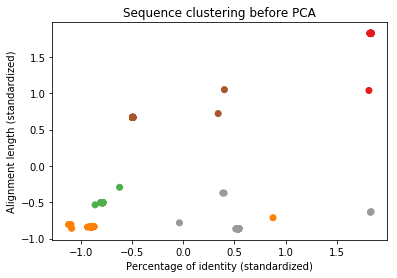

In [82]:
plt.scatter(kaggle_data_preprocessed[:,0],kaggle_data_preprocessed[:,1],c=kaggle_cluster_labels,cmap='Set1')
plt.xlabel('Percentage of identity (standardized)')
plt.ylabel('Alignment length (standardized)')
plt.title('Sequence clustering before PCA')
plt.show()

In [87]:
kaggle_pca = PCA()
kaggle_pca.fit(kaggle_data_preprocessed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

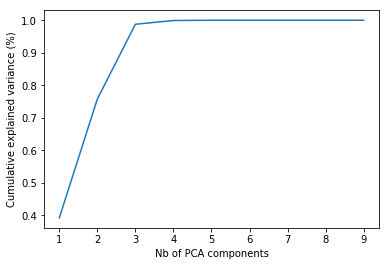

In [88]:
plt.plot(np.arange(1,len(kaggle_pca.explained_variance_ratio_.cumsum())+1),kaggle_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Nb of PCA components')
plt.ylabel('Cumulative explained variance (%)')
plt.show()

In [70]:
kaggle_pca = PCA(n_components=2)
kaggle_pca.fit(kaggle_data_preprocessed)
kaggle_scores_pca = kaggle_pca.transform(kaggle_data_preprocessed)

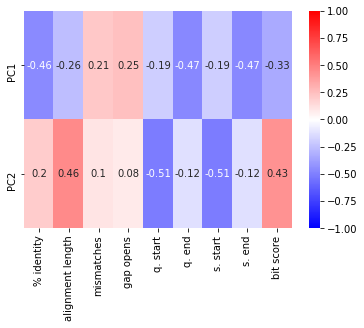

In [71]:
sns.heatmap(kaggle_pca.components_,
           yticklabels=['PC1','PC2'],
           xticklabels=['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'bit score'],
           cmap='bwr',center=0,vmin=-1,vmax=1,annot=True)
plt.show()

In [72]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    kaggle_cluster_labels = clusterer.fit_predict(kaggle_scores_pca)
    silhouette_avg = silhouette_score(kaggle_scores_pca, kaggle_cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5897637058174753
For n_clusters = 3 The average silhouette_score is : 0.8212980035539653
For n_clusters = 4 The average silhouette_score is : 0.8987306652182682
For n_clusters = 5 The average silhouette_score is : 0.9559376803218907
For n_clusters = 6 The average silhouette_score is : 0.9588512950522278
For n_clusters = 7 The average silhouette_score is : 0.9687563415410297
For n_clusters = 8 The average silhouette_score is : 0.9693368275112374
For n_clusters = 9 The average silhouette_score is : 0.9692661677667841
For n_clusters = 10 The average silhouette_score is : 0.9673070645530749


In [84]:
kaggle_clusterer_PCA = KMeans(n_clusters=5, random_state=42)
kaggle_cluster_labels_PCA = kaggle_clusterer.fit_predict(kaggle_scores_pca)

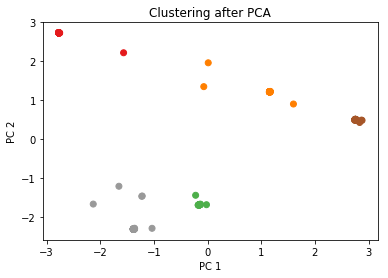

In [85]:
plt.scatter(kaggle_scores_pca[:,0],kaggle_scores_pca[:,1],c=kaggle_cluster_labels_PCA,cmap='Set1')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering after PCA')
plt.show()